In [1]:
#pip install datasets 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])


README.md: 0.00B [00:00, ?B/s]

c:\Users\Gamze kılınç\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Gamze kılınç\.cache\huggingface\hub\datasets--lukebarousse--data_jobs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [3]:
data ={'job_title_short':['Data Analyst','Data Scientist','Data Engineer'], 'job_skills':[['excel','sql','python'],['python','sql','r'],['aws','python','airflow']]}
df_skill_lists=pd.DataFrame(data)
df_skill_lists


,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, sql, r]"
2,Data Engineer,"[aws, python, airflow]"


In [7]:
for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill]=df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill]=df_skill_lists[skill].astype(int)

df_skill_lists.loc['Total']=df_skill_lists.sum()
df_skill_lists

,job_title_short,job_skills,excel,sql,python,r,aws,airflow
0,Data Analyst,"[excel, sql, python]",1,1,1,0,0,0
1,Data Scientist,"[python, sql, r]",0,1,1,1,0,0
2,Data Engineer,"[aws, python, airflow]",0,0,1,0,1,1
Total,Data AnalystData ScientistData Engineer,"[excel, sql, python, python, sql, r, aws, pyth...",1,2,3,1,1,1


kısaltılmış yazım şekli aşağıda: explode


In [8]:
df_skill_lists.explode("job_skills")

,job_title_short,job_skills,excel,sql,python,r,aws,airflow
0,Data Analyst,excel,1,1,1,0,0,0
0,Data Analyst,sql,1,1,1,0,0,0
0,Data Analyst,python,1,1,1,0,0,0
1,Data Scientist,python,0,1,1,1,0,0
1,Data Scientist,sql,0,1,1,1,0,0
1,Data Scientist,r,0,1,1,1,0,0
2,Data Engineer,aws,0,0,1,0,1,1
2,Data Engineer,python,0,0,1,0,1,1
2,Data Engineer,airflow,0,0,1,0,1,1
Total,Data AnalystData ScientistData Engineer,excel,1,2,3,1,1,1


In [10]:
df_skill_lists.explode("job_skills").value_counts("job_skills")


job_skills
python     6
sql        4
aws        2
airflow    2
excel      2
r          2
Name: count, dtype: int64

<Axes: xlabel='job_skills'>

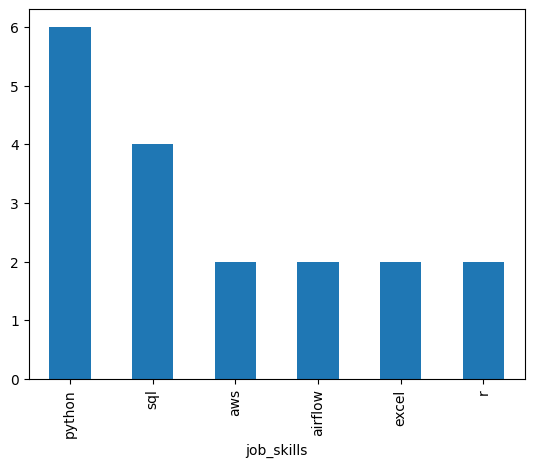

In [11]:

df_skill_lists.explode("job_skills").value_counts("job_skills").plot(kind='bar')
